# Animation of the Nino3 induced NEP

In [48]:
import numpy as np
from matplotlib import pyplot as plt
from osgeo import gdal
import xarray as xr

/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/xarray/coding/times.py:673: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-22.01/lib/python3.9/site-packages/xarray/core/indexing.py:423: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return np.asarray(array[self.key], dtype=None)


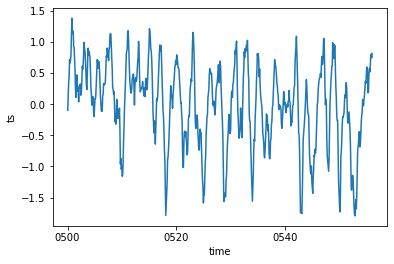

In [49]:
ds1 = xr.open_dataset('/scratch/p66/ars599/andrew2023/day5/n3_anomaly.nc')
ds2 = xr.open_dataset('/scratch/p66/ars599/andrew2023/day5/sst2D_nep_anom.nc')
ds3 = xr.open_dataset('/scratch/p66/ars599/andrew2023/day5/nep_anomaly.nc')

n3_anomaly = ds1.ts
sst2D_nep_anom = ds2.sst
nep_anomaly = ds2.sst
n3_anomaly.plot()
plt.show()

<H1> Lead and lag b/t Nino3 and the NEP SSTa</H1>

In [50]:
def detrend_dim(da, dim, deg=1):
    # detrend along a single dimension
    p = da.polyfit(dim=dim, deg=deg)
    fit = xr.polyval(da[dim], p.polyfit_coefficients)
    return da - fit

# -- Running mean and Detrend
rninoSD = n3_anomaly
ranm = sst2D_nep_anom.rolling(time=7, center=True).mean('time')
rdanm = detrend_dim(ranm,'time',1)

# Leading
corM15 = xr.corr(rninoSD, rdanm.shift(time=-15), dim="time")
corM12 = xr.corr(rninoSD, rdanm.shift(time=-12), dim="time")
corM9 = xr.corr(rninoSD, rdanm.shift(time=-9), dim="time")
corM6 = xr.corr(rninoSD, rdanm.shift(time=-6), dim="time")
corM3 = xr.corr(rninoSD, rdanm.shift(time=-3), dim="time")
# simultaneous
cor0 = xr.corr(rninoSD, rdanm, dim="time")
# Laging
corP3 = xr.corr(rninoSD, rdanm.shift(time=3), dim="time")
corP6 = xr.corr(rninoSD, rdanm.shift(time=6), dim="time")
corP9 = xr.corr(rninoSD, rdanm.shift(time=9), dim="time")
corP12 = xr.corr(rninoSD, rdanm.shift(time=12), dim="time")
corP15 = xr.corr(rninoSD, rdanm.shift(time=15), dim="time")

ncol = 11
nrow = cor0.shape[0]
dummy_array = np.zeros((ncol, nrow))

dummy_array[0,:] = corM15
dummy_array[1,:] = corM12
dummy_array[2,:] = corM9
dummy_array[3,:] = corM6
dummy_array[4,:] = corM3
dummy_array[5,:] = cor0
dummy_array[6,:] = corP3
dummy_array[7,:] = corP6
dummy_array[8,:] = corP9
dummy_array[9,:] = corP12
dummy_array[10,:] = corP15

ncol = 11
txtName = np.empty(ncol, dtype=object)
txtName[0] = 'Leading 15M'
txtName[1] = 'Leading 12M'
txtName[2] = 'Leading 9M'
txtName[3] = 'Leading 6M'
txtName[4] = 'Leading 3M'
txtName[5] = 'simultaneous'
txtName[6] = 'Laging 3M'
txtName[7] = 'Laging 6M'
txtName[8] = 'Laging 9M'
txtName[9] = 'Laging 12M'
txtName[10] = 'Laging 15M'


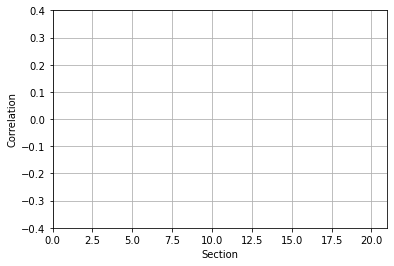

In [51]:
'''
https://jckantor.github.io/CBE30338/A.03-Animation-in-Jupyter-Notebooks.html
'''

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Initialize the figure and axes
fig, ax = plt.subplots()
ax.set_xlim((0,21))
ax.set_ylim((-.4,.4))
line1, = ax.plot([], 'b', lw=2)
pt1, = ax.plot([], 'ro')
ax.grid()
ax.set_xlabel('Section')
ax.set_ylabel('Correlation')
txt_title = ax.text(0.5, 0.95, ' ', transform=ax.transAxes, va='center')



In [52]:
# Define the drawframe function
def drawframe(n):
    x1 = np.arange(0, nrow)
    y1 = dummy_array[n, :]
    line1.set_data(x1, y1)
    pt1.set_data(range(len(y1)), y1)
    txt_title.set_text(txtName[n]) # ('Frame = {0:4d}'.format(n))
    return line1, pt1, txt_title

# Create the animation
anim = animation.FuncAnimation(fig, drawframe, frames=11, interval=800, blit=True)

# Show the animation
#plt.show()
from IPython.display import HTML
HTML(anim.to_html5_video())

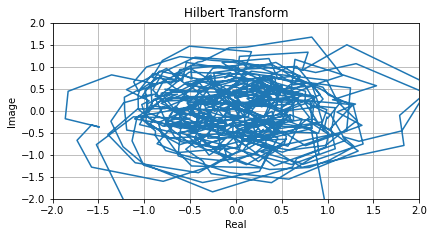

In [53]:
'''
hilbert transform
'''
from scipy import signal
plt.figure(figsize=(6, 6))

# Perform Hilbert transform on the time series
hilbert_transform = signal.hilbert(nep_anomaly[:,15])

# Extract the real and imaginary components
real_part = np.real(hilbert_transform)
imaginary_part = np.imag(hilbert_transform)

# Plot the real and imaginary components
plt.subplot(2, 1, 1)
plt.plot(real_part, imaginary_part)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.xlabel('Real')
plt.ylabel('Image')
plt.title('Hilbert Transform')
plt.grid()
plt.tight_layout()
plt.show()


In [54]:
from PyEMD import EEMD
import numpy as np
import pylab as plt

# Define signal
#t = np.linspace(0, 1, 200)

#sin = lambda x,p: np.sin(2*np.pi*x*t+p)
#S = 3*sin(18,0.2)*(t-0.2)**2
#S += 5*sin(11,2.7)
#S += 3*sin(14,1.6)
#S += 1*np.sin(4*2*np.pi*(t-0.8)**2)
#S += t**2.1 -t

t = nep_anomaly.time.data
S = nep_anomaly.mean('sec').data

In [55]:
# Assign EEMD to `eemd` variable
eemd = EEMD()

# Say we want detect extrema using parabolic method
emd = eemd.EMD
emd.extrema_detection="parabol"

# Execute EEMD on S
eIMFs = eemd.eemd(S, t)
nIMFs = eIMFs.shape[0]

# Plot results
plt.figure(figsize=(12,9))
plt.subplot(nIMFs+1, 1, 1)
plt.plot(t, S, 'r')

for n in range(nIMFs):
    plt.subplot(nIMFs+1, 1, n+2)
    plt.plot(t, eIMFs[n], 'g')
    plt.ylabel("eIMF %i" %(n+1))
    plt.grid()
    plt.locator_params(axis='y', nbins=5)

plt.xlabel("Time [s]")
plt.tight_layout()
plt.savefig('eemd_example', dpi=120)
plt.show()

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [56]:
from scipy import signal

def normalize(v):
    std = v.std()
    return v / std

time_frac = (nep_anomaly.time.dt.year + (nep_anomaly.time.dt.month - 1)/12).values
fs = 1.0 / np.mean(np.diff(time_frac))  # Calculate the sampling frequency

# Compute the power spectral density using Welch's method
f0, p0 = signal.welch(normalize(eIMFs[0]), fs=fs)
f1, p1 = signal.welch(normalize(eIMFs[1]), fs=fs)
f2, p2 = signal.welch(normalize(eIMFs[2]), fs=fs)
f3, p3 = signal.welch(normalize(eIMFs[3]), fs=fs)
f4, p4 = signal.welch(normalize(eIMFs[4]), fs=fs)

# Data for the lines
lines = [(f0, p0, 'IMF1'), (f1, p1, 'IMF2'), (f2, p2, 'IMF3'), (f3, p3, 'IMF4'), (f4, p4, 'IMF5')]

# Plot the lines and create legends
for i, line in enumerate(lines):
    plt.plot(line[0], line[1], label=line[2])
    plt.xscale('log')
    #plt.yscale('log')
    plt.xlabel('Frequency')
    plt.ylabel('Power')
    plt.grid()
    if i == len(lines) - 1:
        plt.legend()

# Display the plot
plt.show()



NameError: name 'eIMFs' is not defined

In [57]:
'''
Hilbert transform

Dear Arnold

I can only commiserate with you on your rejection by Nature.  
I think the science community is practicing ‘herd immunity’ now: 90% believe in something, then it would be right.  
For example, the use of Hilbert without proper check the condition is wrong by Bedrosian and Nuttall theorems.  
But since Hilbert Transform is well established, even if the usage is wrong, it would be accepted.

...

Norden Huang

'''
plt.figure(figsize=(6, 6))

# Perform Hilbert transform on the time series
hilbert_transform = signal.hilbert(eIMFs[2])

# Extract the real and imaginary components
real_part = np.real(hilbert_transform)
imaginary_part = np.imag(hilbert_transform)

# Plot the real and imaginary components
plt.subplot(2, 1, 1)
plt.plot(real_part, imaginary_part)
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel('Real')
plt.ylabel('Image')
plt.title('Hilbert Transform')
plt.grid()
plt.tight_layout()
plt.show()

NameError: name 'eIMFs' is not defined

<Figure size 432x432 with 0 Axes>